In [16]:
import data_extraction as dx
import utils as ut
import data_preparation as dp
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [17]:
data = []
labels = []

In [18]:
dx.loadDataset("./dataset/numbers", data, labels)

loading data set
loading current dir: 0
loading current dir: 1
loading current dir: 2
loading current dir: 3
loading current dir: 4
loading current dir: 5
loading current dir: 6
loading current dir: 7
loading current dir: 8
loading current dir: 9
loading data set - done


In [19]:
ut.saveData("data_numbers_bin", data)
ut.saveData("data_numbers_labels", labels)

10160
10160
shape: 28 28


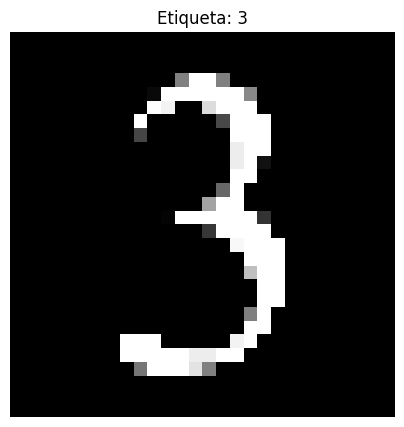

In [20]:
print(len(data))
print(len(labels))
n = 4000
img = data[n]
label = labels[n]
print("shape:", len(img), len(img[0]))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title(f'Etiqueta: {label}')
plt.axis('off')
plt.show()


In [21]:
data = np.array(data)
data = data.reshape(data.shape[0], -1)

In [22]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [23]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=3)


In [24]:
poly = svm.SVC(kernel='poly', degree=3, C=1, verbose=True)
model = svm.SVC(C = 1, kernel='linear', verbose=True)

In [25]:
model.fit(x_train, y_train)
poly.fit(x_train, y_train)

[LibSVM]

SVC(C=1, kernel='poly', verbose=True)

In [26]:
print(len(x_test))

2032


In [27]:
poly_pred = poly.predict(x_test)
model_pred = model.predict(x_test)

In [28]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  96.60
F1 (Polynomial Kernel):  96.68


In [29]:
rbf_accuracy = accuracy_score(y_test, model_pred)
rbf_f1 = f1_score(y_test, model_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  97.93
F1 (RBF Kernel):  97.94


In [30]:
ut.saveData("./models/svm_linear", model)
ut.saveData("./models/svm_poly", poly)

In [31]:
print(poly)
print(model)

SVC(C=1, kernel='poly', verbose=True)
SVC(C=1, kernel='linear')
